# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

The data represent 17 marketing campaigns from the Portugese bank, corresponding to a total of 79,354 contacts

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [16]:
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [4]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [5]:
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [6]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
null_table = df.isna().sum().reset_index()
null_table.columns = ['Column Name', 'Null Values']

print(null_table)

       Column Name  Null Values
0              age            0
1              job            0
2          marital            0
3        education            0
4          default            0
5          housing            0
6             loan            0
7          contact            0
8            month            0
9      day_of_week            0
10        duration            0
11        campaign            0
12           pdays            0
13        previous            0
14        poutcome            0
15    emp.var.rate            0
16  cons.price.idx            0
17   cons.conf.idx            0
18       euribor3m            0
19     nr.employed            0
20               y            0


In [9]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Create a list of DataFrames to concatenate
frames_to_concat = []

for col in categorical_columns:
    unique_counts_df = pd.DataFrame({
        'Column Name': [col],
        'Unique Value Counts': [df[col].nunique()]
    })
    frames_to_concat.append(unique_counts_df)

# Concatenate the DataFrames in the list
unique_counts_table = pd.concat(frames_to_concat, ignore_index=True)

print(unique_counts_table)

    Column Name  Unique Value Counts
0           job                   12
1       marital                    4
2     education                    8
3       default                    3
4       housing                    3
5          loan                    3
6       contact                    2
7         month                   10
8   day_of_week                    5
9      poutcome                    3
10            y                    2


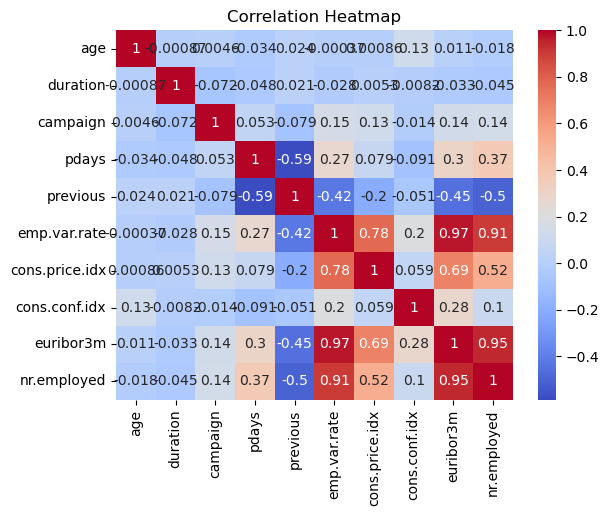

In [10]:
# Calculate the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Visualize the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## BT Notes
## Note on consolidating correlating columns

Given the correlation for Euribor3m, nr.employed, emp.var.rate, we will just use one of the values and drop the others

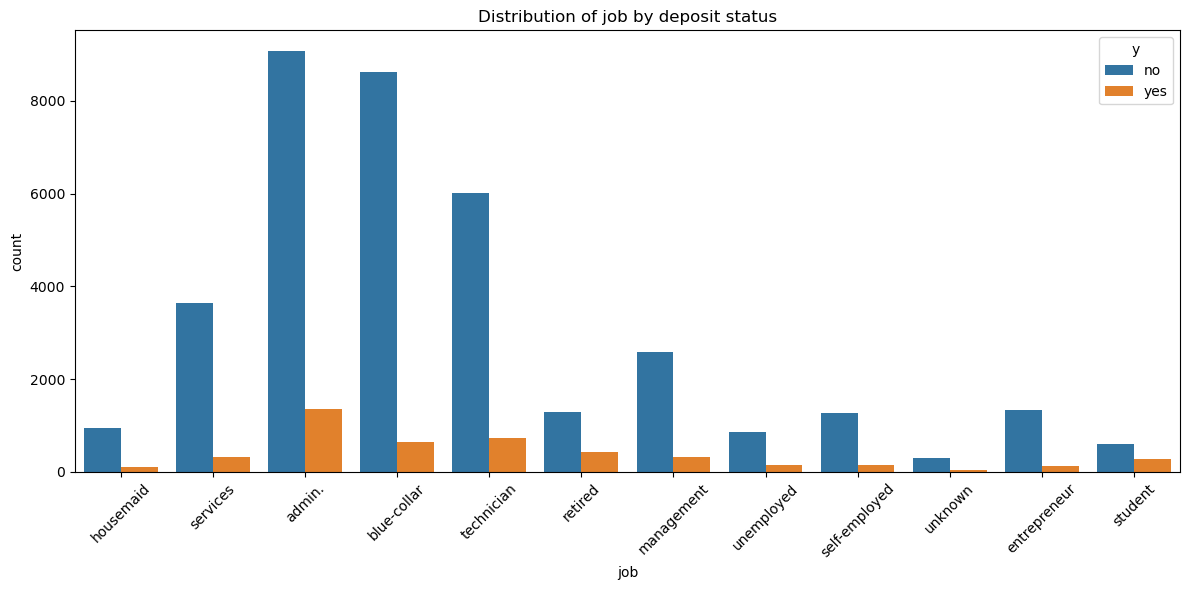

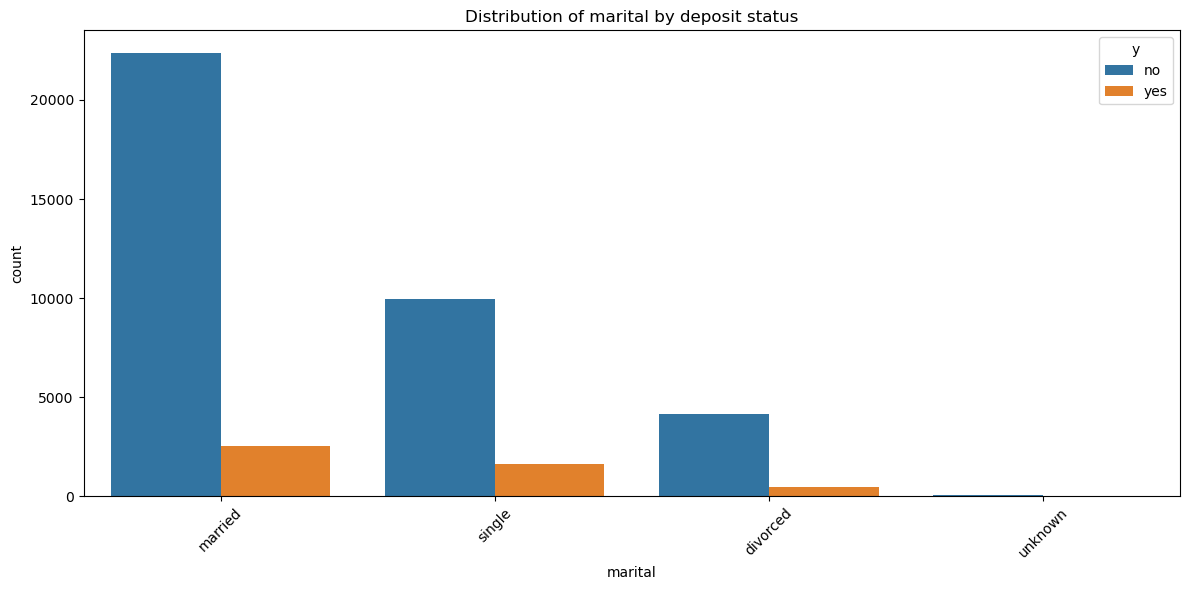

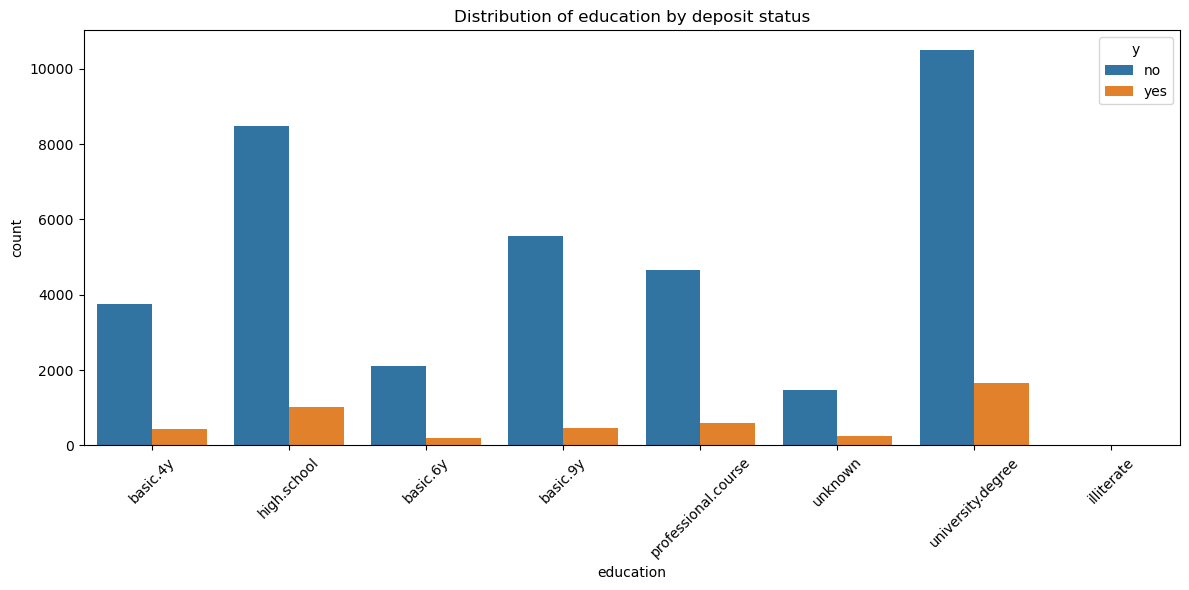

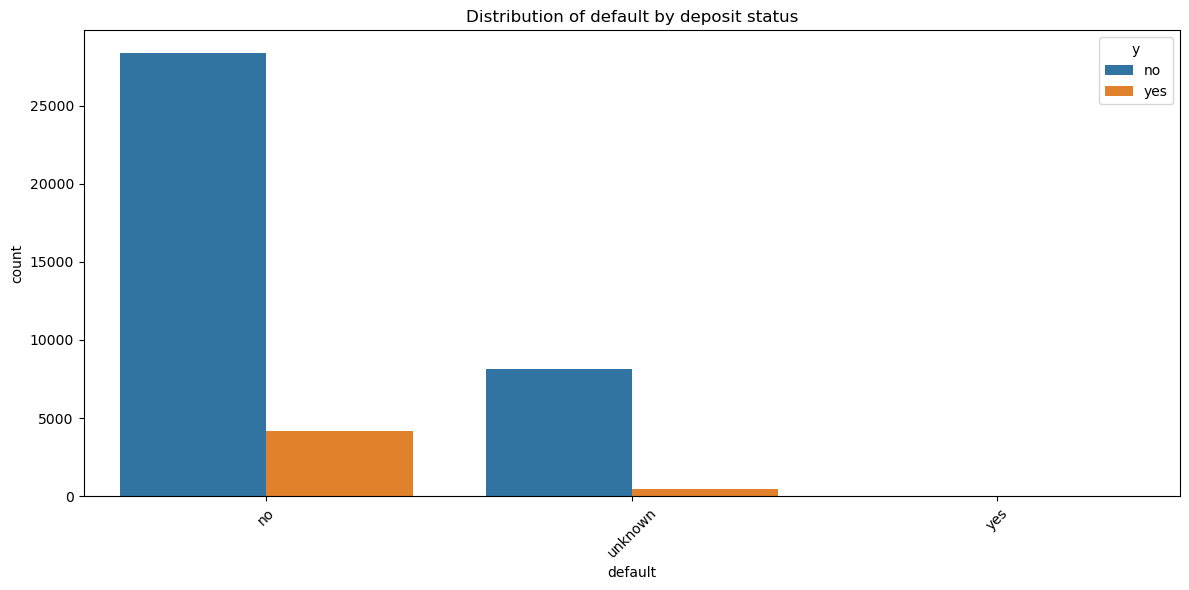

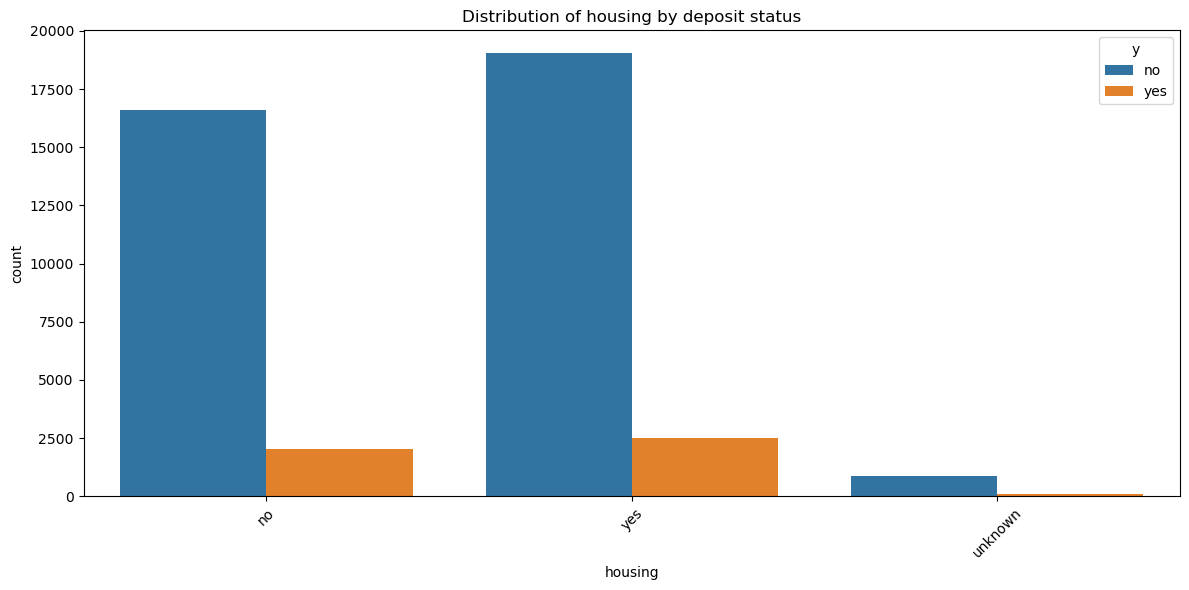

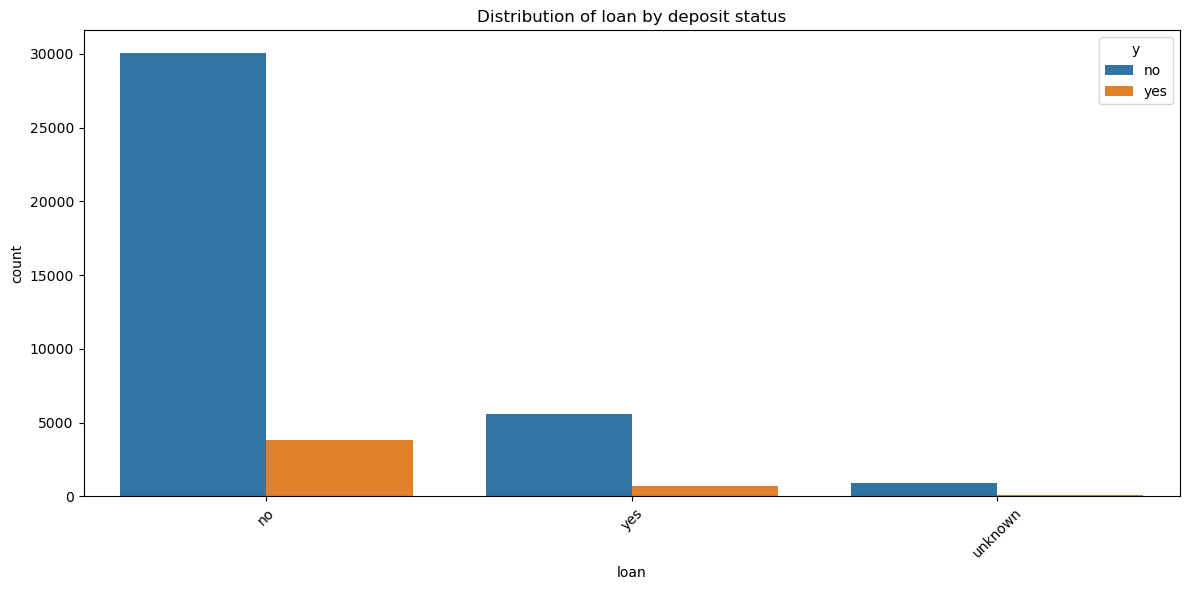

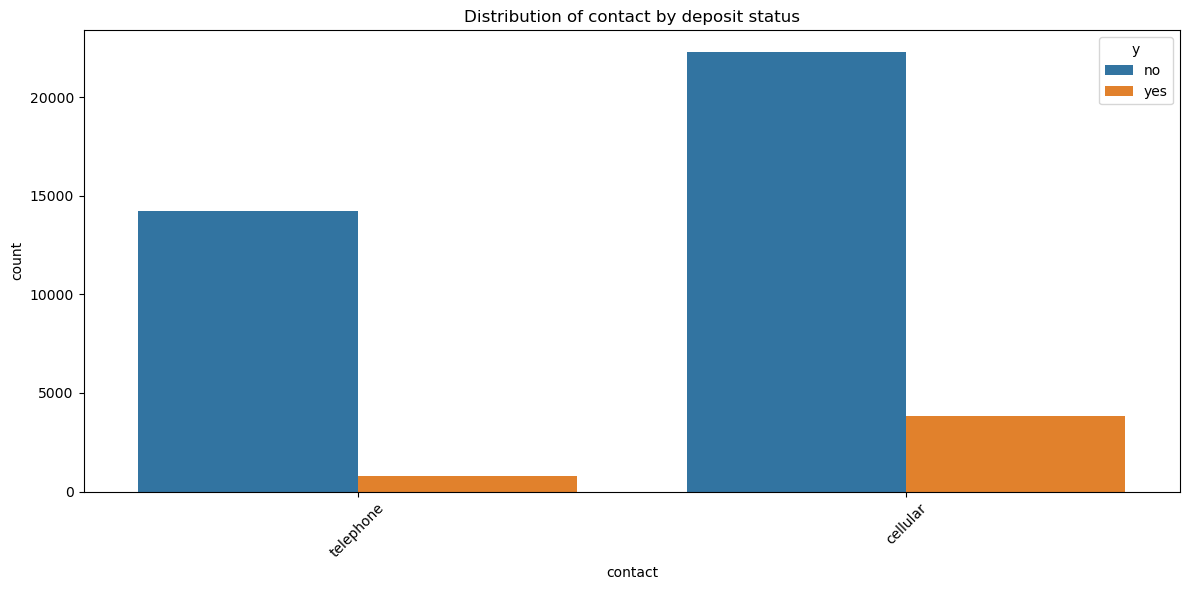

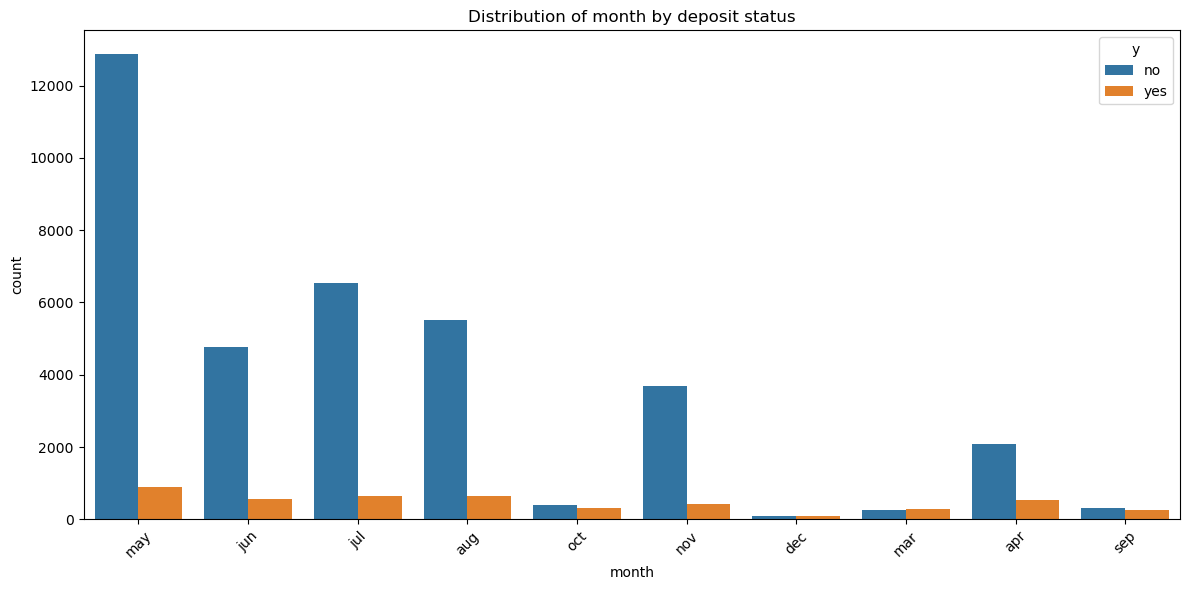

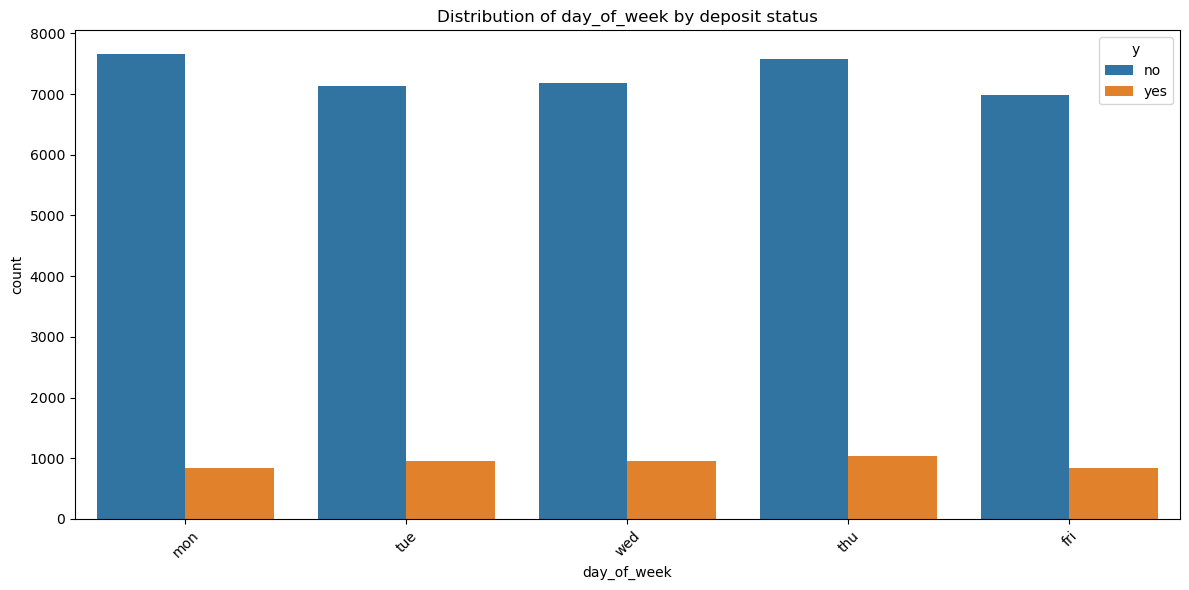

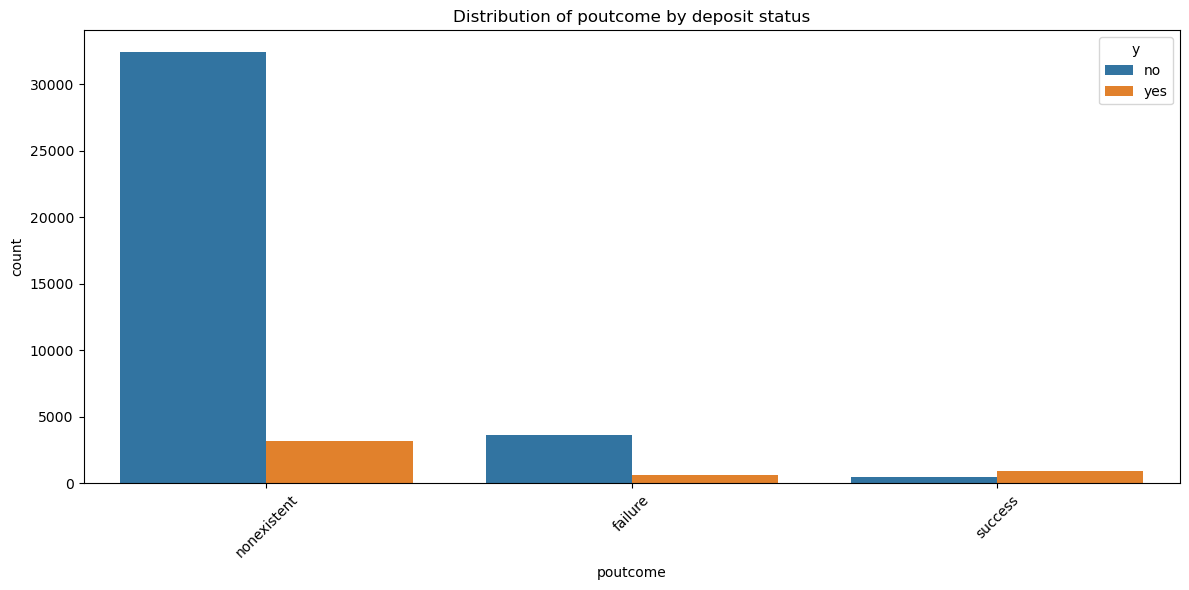

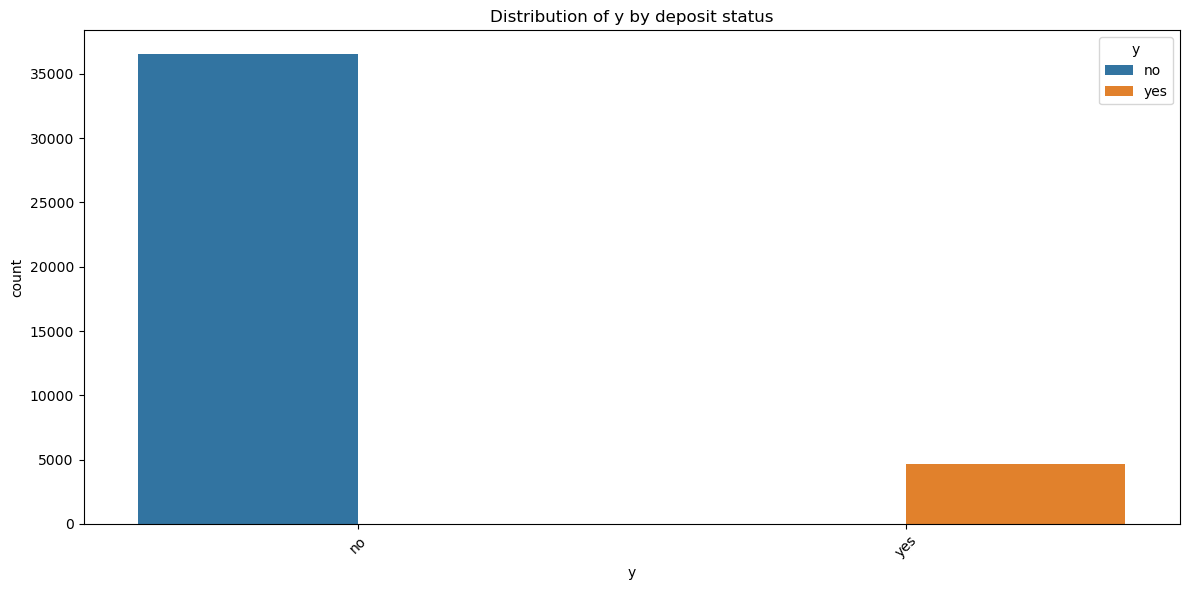

In [43]:
# List of categorical columns
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

# Plot each categorical variable against 'y'
for col in categorical_columns:
    plt.figure(figsize=(12,6))
    sns.countplot(data=df, x=col, hue='y')
    plt.title(f'Distribution of {col} by deposit status')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [44]:
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


result = []

# Iterate through the categorical columns
for col in categorical_columns:
    # Group the DataFrame by the categorical column and calculate the percentage of 'yes' and 'no'
    group = df.groupby([col, 'y']).size().unstack(fill_value=0)
    group['percent_yes'] = ((group['yes'] / (group['yes'] + group['no'])) * 100).round(1)
    group['percent_no'] = ((group['no'] / (group['yes'] + group['no'])) * 100).round(1)
    
    # Reset the index and create a DataFrame for this column
    group.reset_index(inplace=True)
    group.rename_axis(None, axis=1, inplace=True)
    
    # Append the results to the list
    result.append(group)

# Display the results as a table
for i, col in enumerate(cat_cols):
    print(f"Category Column: {col}")
    print(result[i])
    print()

Category Column: job
              job    no   yes  percent_yes  percent_no
0          admin.  9070  1352         13.0        87.0
1     blue-collar  8616   638          6.9        93.1
2    entrepreneur  1332   124          8.5        91.5
3       housemaid   954   106         10.0        90.0
4      management  2596   328         11.2        88.8
5         retired  1286   434         25.2        74.8
6   self-employed  1272   149         10.5        89.5
7        services  3646   323          8.1        91.9
8         student   600   275         31.4        68.6
9      technician  6013   730         10.8        89.2
10     unemployed   870   144         14.2        85.8
11        unknown   293    37         11.2        88.8

Category Column: marital
    marital     no   yes  percent_yes  percent_no
0  divorced   4136   476         10.3        89.7
1   married  22396  2532         10.2        89.8
2    single   9948  1620         14.0        86.0
3   unknown     68    12         15.0 

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

We need to beat the baseline performance of always guessing the highest percentage case. In this example, the majority of targets do not respond to a campaign, thus our baseline performance would be if we assume that all target say no to a campaign

In [31]:
most_frequent_class_percentage = y_train.value_counts(normalize=True).max()

print(most_frequent_class_percentage)

0.8878314072059823


We need to beat 89% accuracy to beat the baseline prediction

## BT Note
Given how I am going to structure my Logistic Regression Pipeline, I will do Feature Engineer after splitting the dataset

### Problem 5, 6, 8: Train/Test Split, Engineering Features, Build Model

With your data prepared, split it into a train and test set.

In [13]:
df_s = df[['job', 'marital', 'education', 'default', 'housing', 'loan', 'age', 'y']]

In [14]:
df_s.loc[:, 'y'] = df['y'].map({'yes':1, 'no':0})

C:\Users\blake\AppData\Local\Temp\ipykernel_5864\2337141022.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s.loc[:, 'y'] = df['y'].map({'yes':1, 'no':0})
C:\Users\blake\AppData\Local\Temp\ipykernel_5864\2337141022.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_s.loc[:, 'y'] = df['y'].map({'yes':1, 'no':0})


In [17]:
X_train, X_test, y_train, y_test = train_test_split(df_s.drop('y', axis=1), df_s['y'], random_state=442)

In [19]:
# Test to make sure there are some yes values in the test set
y_test.sum()

1175

In [20]:
selector = make_column_selector(dtype_include=object)

transformer = make_column_transformer(
    (OneHotEncoder(drop='first'), selector), 
     remainder = StandardScaler()
    )

In [21]:
extractor = SelectFromModel(LogisticRegression(penalty='l1', solver = 'liblinear' ,random_state = 42))

In [22]:
lgr_pipe = Pipeline([('transformer', transformer),
                    ('selector', extractor),
                    ('lgr', LogisticRegression(random_state=42, max_iter = 1000))]
                   )

### Problem 9: Score the Model

What is the accuracy of your model?

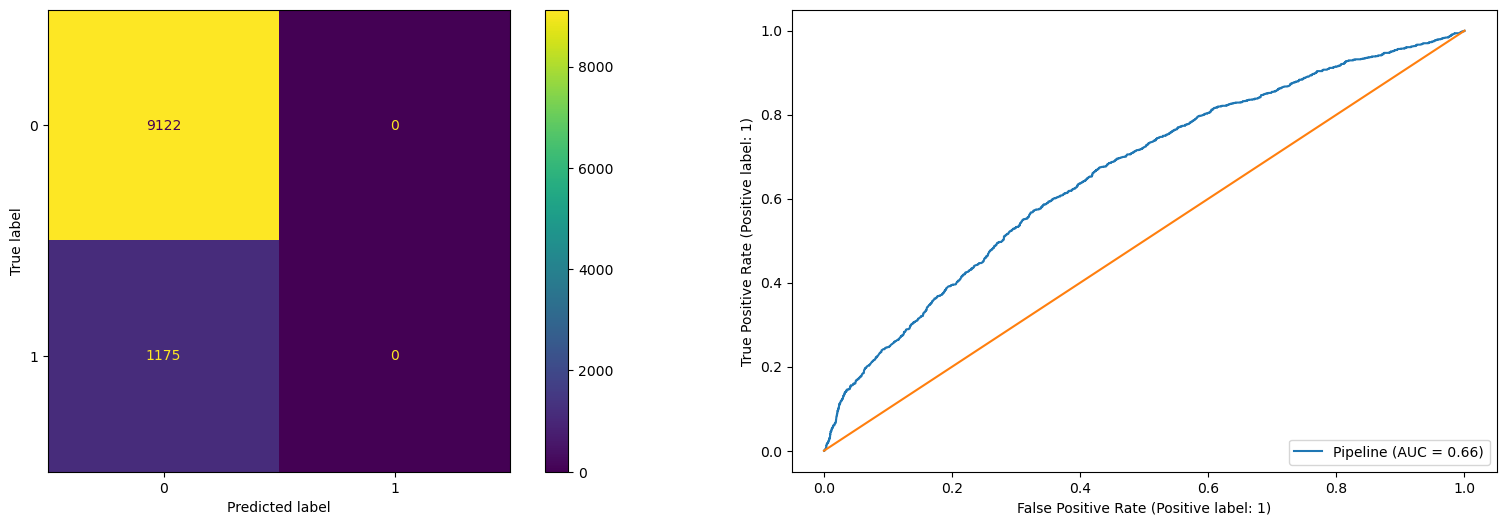

In [32]:
fig, ax = plt.subplots(1, 2, figsize = (20, 6))
ConfusionMatrixDisplay.from_estimator(lgr_pipe, X_test, y_test, ax = ax[0])
RocCurveDisplay.from_estimator(lgr_pipe, X_test, y_test, ax = ax[1])
ax[1].plot(np.array([0, 1]), np.array([0, 1]))


In [33]:
feature_names = lgr_pipe.named_steps['transformer'].get_feature_names_out() 
selected_features =feature_names[ [int(i[1:]) for i in lgr_pipe.named_steps['selector'].get_feature_names_out()]]
clean_names = [i.split('__')[-1] for i in selected_features]
coef_df = pd.DataFrame({'feature': clean_names, 'coefs': lgr_pipe.named_steps['lgr'].coef_[0]})
coef_df['coefs'] = coef_df['coefs'].apply(abs)
coef_df = coef_df.sort_values(by = 'coefs', ascending = False)
coef_df.head(10)

,feature,coefs
7,job_student,1.135251
21,default_unknown,0.924746
17,education_illiterate,0.854749
4,job_retired,0.685533
12,marital_single,0.388652
1,job_entrepreneur,0.378983
0,job_blue-collar,0.349101
13,marital_unknown,0.313524
9,job_unemployed,0.274829
6,job_services,0.260978


## BT Notes

Interesting and disheartening. Looking at these results, my logistic regression model is predicting every row to be a no. This does result in pretty good accuracy, but poor sensitivity and recall. I am going to play around with the probability threshold and see how that alters my results.

In [34]:
from sklearn.metrics import accuracy_score

# Split your data into train, validation, and test sets
X_train2, X_temp, y_train2, y_temp = train_test_split(df_s.drop('y', axis=1), df_s['y'], test_size=0.3, random_state=42)
X_validation, X_test2, y_validation, y_test2 = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Train your logistic regression model on the training set
lgr_pipe.fit(X_train2, y_train2)

# Predict probabilities on the validation set
validation_probs = lgr_pipe.predict_proba(X_validation)[:, 1]

# Define a range of thresholds to test
thresholds = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]

# Initialize variables to keep track of the best threshold and accuracy
best_threshold = None
best_accuracy = 0
best_recall = 0

# Loop through thresholds and find the best one
for threshold in thresholds:
    # Convert probabilities to binary predictions based on the threshold
    validation_predictions = (validation_probs > threshold).astype(int)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_validation, validation_predictions)
    recall = recall_score(y_validation, validation_predictions)
    
#     # Check if this threshold resulted in higher accuracy
#     if accuracy > best_accuracy:
#         best_accuracy = accuracy
#         best_threshold = threshold
        
    # Check if this threshold resulted in higher recall
    if recall > best_recall:
        best_recall = recall
        best_accuracy = accuracy
        best_threshold = threshold

# Use the best threshold to make predictions on the test set
test_probs = lgr_pipe.predict_proba(X_test2)[:, 1]
test_predictions = (test_probs > best_threshold).astype(int)

conf_matrix_custom = confusion_matrix(y_test2, test_predictions)

print("true negative | false positive")
print("false negatives | true positives")
print(conf_matrix_custom)

print("Searching for best recall")
print("Best Threshold:", best_threshold)
print("Accuracy Score:", best_accuracy)
print("Recall Score:", best_recall)

# Evaluate your model on the test set using metrics like accuracy, precision, recall, F1-score, etc.

true negative | false positive
false negatives | true positives
[[2552 2936]
 [ 162  529]]
Searching for best recall
Best Threshold: 0.1
Accuracy Score: 0.4881838782777598
Recall Score: 0.7292263610315186


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [42]:
# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_s.drop('y', axis=1), df_s['y'], test_size=0.2, random_state=42)

# Define a list of classifiers
classifiers = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Support Vector Machine', SVC())
]

# Define the transformer
selector = make_column_selector(dtype_include=object)

transformer = make_column_transformer(
    (OneHotEncoder(drop='first'), selector), 
    remainder=StandardScaler()
)

# Initialize a list to store the results
results = []

# Loop through the classifiers
for name, model in classifiers:
    start_time = time.time()
    
    # Create a pipeline with the transformer and the classifier
    pipeline = Pipeline([
        ('preprocessor', transformer),
        ('classifier', model)
    ])
    
    # Train the model
    pipeline.fit(X_train, y_train)
    
    # Predict on training and testing data
    train_preds = pipeline.predict(X_train)
    test_preds = pipeline.predict(X_test)
    
    # Calculate accuracy on training and testing data
    train_accuracy = accuracy_score(y_train, train_preds)
    test_accuracy = accuracy_score(y_test, test_preds)
    
    end_time = time.time()
    train_time = end_time - start_time
    
    # Append the results to the list
    results.append([name, train_accuracy, test_accuracy, train_time])

# Create a Pandas DataFrame to display the results
results_df = pd.DataFrame(results, columns=['Model', 'Train Accuracy', 'Test Accuracy', 'Train Time (s)'])

# Print the DataFrame
print(results_df)


                    Model  Train Accuracy  Test Accuracy  Train Time (s)
0     Logistic Regression        0.887557       0.886502        0.503274
1     K-Nearest Neighbors        0.889742       0.873999       19.851553
2           Decision Tree        0.916601       0.861860        0.868755
3  Support Vector Machine        0.888376       0.886623       93.991298


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?


The gender feature should not be included in the dataset because there is not a large discrepancy in results based on gender. The paper should that 11% of males were successful while 12% of females were successful. 

When looking at features that we want to further explore or engineer, we should look for the features that show the biggest difference in results. This will increase our signal to noise while using them in a model. 

Another column we could do without is the Marital column. There is not a notable difference to outcomes based on the Marital status. 

##### Questions